In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

processed = Path("../data/processed")
datafile = processed / "whatsapp-20240214-112323.parq"

if not datafile.exists():
    logger.warning("Datafile does not exist. First run src/preprocess.py, and check the timestamp!")
df = pd.read_parquet(datafile)
df.head(20)

,timestamp,author,message,has_emoji,message_length,has_link,hour,day_of_week
0,2017-03-05 15:08:00,Unknown,05-03-2017 15:08 - ‎Bryan Zaagsma heeft de gro...,True,70,False,15:08:00,6
1,2018-05-07 08:09:00,Unknown,07-05-2018 08:09 - ‎Bryan Zaagsma heeft u toeg...,False,53,False,08:09:00,0
2,2018-05-07 08:13:00,Justin Velthuijsen,2\n,False,3,False,08:13:00,0
3,2018-05-07 08:14:00,Kerim Ozel,3\n,False,3,False,08:14:00,0
4,2018-05-07 08:20:00,Stephan van den Hoogen,4\n,False,3,False,08:20:00,0
5,2018-05-07 08:21:00,Falco,5\n,False,3,False,08:21:00,0
6,2018-05-07 08:21:00,Falco,Dit is aantal voor morgen avond neem ik aan\n,False,45,False,08:21:00,0
7,2018-05-07 08:22:00,Justin Velthuijsen,Jaa\n,False,5,False,08:22:00,0
8,2018-05-07 08:22:00,Falco,Nice\n,False,6,False,08:22:00,0
9,2018-05-07 08:34:00,Romano Mundo,6\n,False,3,False,08:34:00,0


,message_length,has_media,count
author,,,
+31 6 15270734,51.083333,0.000000,12
+31 6 25359296,53.896552,0.022989,87
+31 6 53161988,98.833333,0.000000,12
Belly Zaalvoetbal,32.000000,0.000000,124
Bryan Bibo,27.742287,0.007260,551
Bryan Zaagsma,44.749288,0.014245,1755
Casper Guit,25.438662,0.022305,269
Falco,30.212054,0.042411,896
Jeroen Huter,24.763514,0.003378,296


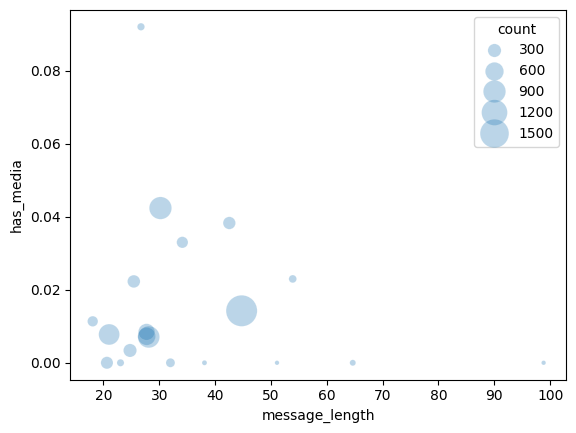

In [18]:
# Add a new column 'media_omitted' indicating whether "<Media weggelaten>" is present
df['has_media'] = df['message'].str.contains(r'<Media weggelaten>', case=False, regex=True)

# Convert boolean values to 'True' or 'False' strings if needed
# df['has_media'] = df['has_media'].map({True: 'True', False: 'False'})

# Display the DataFrame to verify the changes
df.head()

p = df.groupby(["author"]).agg({
    "message_length": "mean",
    "has_media": "mean",
    "author": "count"
}).rename(columns={"author": "count"})

p = p[p["count"] > 10]
sns.scatterplot(data=p, x="message_length", y="has_media", size="count", sizes=(10, 500), alpha=0.3)
p

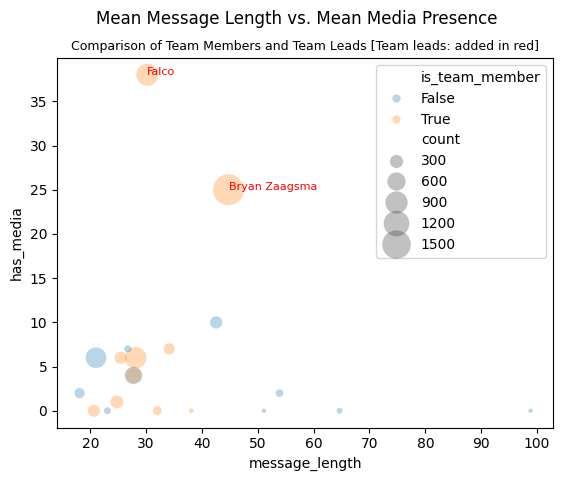

                        message_length  has_media  count  is_team_member  \
author                                                                     
+31 6 15270734               51.083333          0     12           False   
+31 6 25359296               53.896552          2     87           False   
+31 6 53161988               98.833333          0     12           False   
Belly Zaalvoetbal            32.000000          0    124            True   
Bryan Bibo                   27.742287          4    551           False   
Bryan Zaagsma                44.749288         25   1755            True   
Casper Guit                  25.438662          6    269            True   
Falco                        30.212054         38    896            True   
Jeroen Huter                 24.763514          1    296            True   
Jeroen Zaalvoetbal           18.079545          2    176           False   
Justin Velthuijsen           21.016818          6    773           False   
Kay Jacobs  

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'message' and 'author' columns
# Add a new column 'has_media' indicating whether "<Media weggelaten>" is present
df['has_media'] = df['message'].str.contains(r'<Media weggelaten>', case=False, regex=True)

# Create a column to identify team members
team_members = [
    'Belly Zaalvoetbal', 'Bryan Zaagsma', 'Casper Guit', 'Falco',
    'Jeroen Huter', 'Jeroen Zaaltvoetbal', 'Kay Jacobs', 'Kevin Zaagsma',
    'Romano Mundo', 'Ruben Zaalvoetbal', 'Tom Danko'
]
df['is_team_member'] = df['author'].isin(team_members)

# Create a column to identify team leads
team_leads = ['Falco', 'Bryan Zaagsma']
df['is_team_lead'] = df['author'].isin(team_leads)

# Display the DataFrame to verify the changes


# Group by "author" and aggregate the necessary columns
p = df.groupby(["author"]).agg({
    "message_length": "mean",
    "has_media": "sum",
    "author": "count",
    "is_team_member": "first",  # Take the first value since it's the same for each author
    "is_team_lead": "first"      # Take the first value since it's the same for each author
}).rename(columns={"author": "count"})

# Filter rows with count greater than 10
p = p[p["count"] > 10]



# Create scatterplot
sns.scatterplot(data=p, x="message_length", y="has_media", size="count", sizes=(10, 500), alpha=0.3, hue="is_team_member")

# Highlight team leads
team_lead_indices = p[p["is_team_lead"]].index
for lead in team_lead_indices:
    plt.text(p.loc[lead, "message_length"], p.loc[lead, "has_media"], lead, fontsize=8, color='red')

plt.title("Comparison of Team Members and Team Leads [Team leads: added in red]", fontsize=9)
plt.suptitle("Mean Message Length vs. Mean Media Presence", fontsize=12)

plt.show()

# Display resulting DataFrame
print(p)


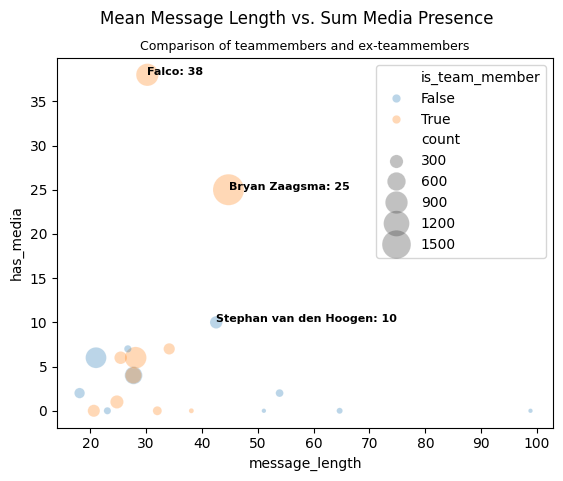

                        message_length  has_media  count  is_team_member  \
author                                                                     
+31 6 15270734               51.083333          0     12           False   
+31 6 25359296               53.896552          2     87           False   
+31 6 53161988               98.833333          0     12           False   
Belly Zaalvoetbal            32.000000          0    124            True   
Bryan Bibo                   27.742287          4    551           False   
Bryan Zaagsma                44.749288         25   1755            True   
Casper Guit                  25.438662          6    269            True   
Falco                        30.212054         38    896            True   
Jeroen Huter                 24.763514          1    296            True   
Jeroen Zaalvoetbal           18.079545          2    176           False   
Justin Velthuijsen           21.016818          6    773           False   
Kay Jacobs  

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'message' and 'author' columns
# Add a new column 'has_media' indicating whether "<Media weggelaten>" is present
df['has_media'] = df['message'].str.contains(r'<Media weggelaten>', case=False, regex=True)

# Create a column to identify team members
team_members = [
    'Belly Zaalvoetbal', 'Bryan Zaagsma', 'Casper Guit', 'Falco',
    'Jeroen Huter', 'Jeroen Zaaltvoetbal', 'Kay Jacobs', 'Kevin Zaagsma',
    'Romano Mundo', 'Ruben Zaalvoetbal', 'Tom Danko'
]
df['is_team_member'] = df['author'].isin(team_members)

# Create a column to identify team leads
team_leads = ['Falco', 'Bryan Zaagsma']
df['is_team_lead'] = df['author'].isin(team_leads)

# Group by "author" and aggregate the necessary columns
p = df.groupby(["author"]).agg({
    "message_length": "mean",
    "has_media": "sum",
    "author": "count",
    "is_team_member": "first",  # Take the first value since it's the same for each author
    "is_team_lead": "first"      # Take the first value since it's the same for each author
}).rename(columns={"author": "count"})

# Filter rows with count greater than 10
p = p[p["count"] > 10]

# Create scatterplot
sns.scatterplot(data=p, x="message_length", y="has_media", size="count", sizes=(10, 500), alpha=0.3, hue="is_team_member")

# Show names of the top 3 authors with the highest sum of has_media
top_3_has_media = p.nlargest(3, 'has_media')['has_media']
for i, (author, sum_has_media) in enumerate(top_3_has_media.items()):
    plt.text(p.loc[author, "message_length"], p.loc[author, "has_media"], f"{author}: {sum_has_media}", fontsize=8, fontweight='bold')


# Add title and subtitle with smaller font size
plt.title("Comparison of teammembers and ex-teammembers", fontsize=9)
plt.suptitle("Mean Message Length vs. Sum Media Presence", fontsize=12)
plt.show()

# Display resulting DataFrame
print(p)


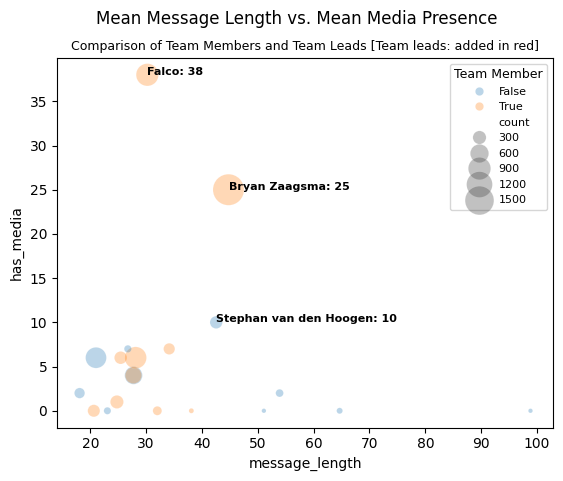

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_mean_message_vs_media(df):
    """
    Plot mean message length vs. mean media presence for authors in DataFrame df.
    Highlight team leads in red with bold font.
    """
    # Add a new column 'has_media' indicating whether "<Media weggelaten>" is present
    df['has_media'] = df['message'].str.contains(r'<Media weggelaten>', case=False, regex=True)

    # Create a column to identify team members
    team_members = [
        'Belly Zaalvoetbal', 'Bryan Zaagsma', 'Casper Guit', 'Falco',
        'Jeroen Huter', 'Jeroen Zaaltvoetbal', 'Kay Jacobs', 'Kevin Zaagsma',
        'Romano Mundo', 'Ruben Zaalvoetbal', 'Tom Danko'
    ]
    df['is_team_member'] = df['author'].isin(team_members)

    # Group by "author" and aggregate the necessary columns
    p = df.groupby(["author"]).agg({
        "message_length": "mean",
        "has_media": "sum",
        "author": "count",
        "is_team_member": "first",  # Take the first value since it's the same for each author
        "is_team_lead": "first"      # Take the first value since it's the same for each author
    }).rename(columns={"author": "count"})

    # Filter rows with count greater than 10
    p = p[p["count"] > 10]

    # Create scatterplot
    ax = sns.scatterplot(data=p, x="message_length", y="has_media", size="count", sizes=(10, 500), alpha=0.3, hue="is_team_member")

    # Add title and subtitle with smaller font size
    plt.title("Comparison of Team Members and Team Leads [Team leads: added in red]", fontsize=9)
    plt.suptitle("Mean Message Length vs. Mean Media Presence", fontsize=12)

    # Show names of the top 3 authors with the highest sum of has_media
    top_3_has_media = p.nlargest(3, 'has_media')['has_media']
    for i, (author, sum_has_media) in enumerate(top_3_has_media.items()):
        plt.text(p.loc[author, "message_length"], p.loc[author, "has_media"], f"{author}: {sum_has_media}", fontsize=8, fontweight='bold')

    # Customizing legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], title="Team Member", fontsize=8, title_fontsize=9)

    # Set a formatter for the legend to use a decimal separator
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    plt.show()

# Usage example:
plot_mean_message_vs_media(df)


In [37]:
def convert_to_decimal_hours(timestamp):
    dec_hour = timestamp.hour + timestamp.minute / 60 + timestamp.second / 3600
    return dec_hour

df["hour"] = df["timestamp"].apply(convert_to_decimal_hours)
df["log_len"] = df["message_length"].apply(lambda x: np.log(x))
df.head()



,timestamp,author,message,has_emoji,message_length,has_link,hour,day_of_week,media_omitted,has_media,is_team_member,is_team_lead,log_len
0,2017-03-05 15:08:00,Unknown,05-03-2017 15:08 - ‎Bryan Zaagsma heeft de gro...,True,70,False,15.133333,6,False,False,False,False,4.248495
1,2018-05-07 08:09:00,Unknown,07-05-2018 08:09 - ‎Bryan Zaagsma heeft u toeg...,False,53,False,8.150000,0,False,False,False,False,3.970292
2,2018-05-07 08:13:00,Justin Velthuijsen,2\n,False,3,False,8.216667,0,False,False,False,False,1.098612
3,2018-05-07 08:14:00,Kerim Ozel,3\n,False,3,False,8.233333,0,False,False,False,False,1.098612
4,2018-05-07 08:20:00,Stephan van den Hoogen,4\n,False,3,False,8.333333,0,False,False,False,False,1.098612


<Axes: xlabel='hour', ylabel='log_len'>

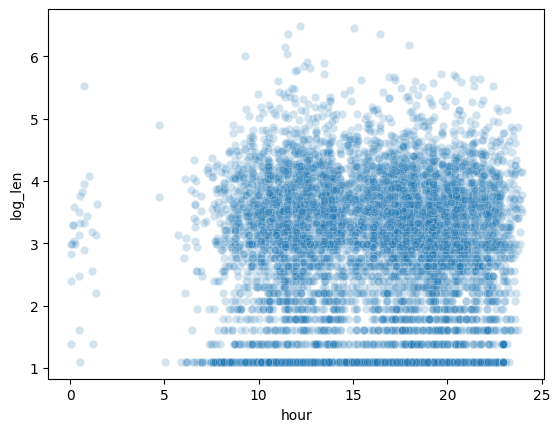

In [4]:
sns.scatterplot(data=df, x="hour", y="log_len", alpha=0.2)

,message_length,has_emoji,count
author,,,
+31 6 15270734,51.083333,0.166667,12
+31 6 25359296,53.896552,0.022989,87
+31 6 53161988,98.833333,0.083333,12
Belly Zaalvoetbal,32.000000,0.016129,124
Bryan Bibo,27.742287,0.219601,551
Bryan Zaagsma,44.749288,0.170370,1755
Casper Guit,25.438662,0.204461,269
Falco,30.212054,0.107143,896
Jeroen Huter,24.763514,0.189189,296


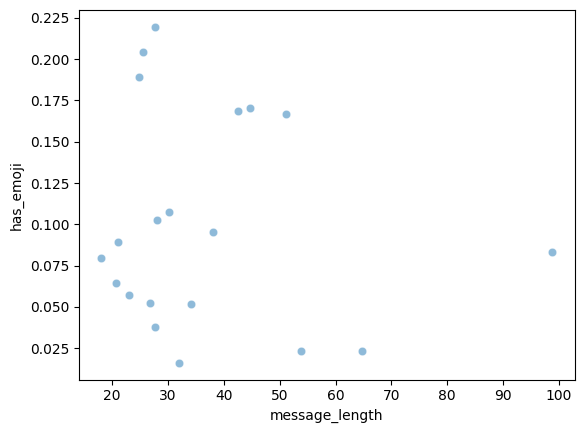

In [5]:
p = df.groupby(["author"]).agg({
    "message_length": "mean",
    "has_emoji": "mean",
    "author": "count"
}).rename(columns={"author": "count"})

p = p[p["count"] > 10]
sns.scatterplot(data=p, x="message_length", y="has_emoji", alpha=0.5)
p

<Axes: xlabel='message_length', ylabel='has_emoji'>

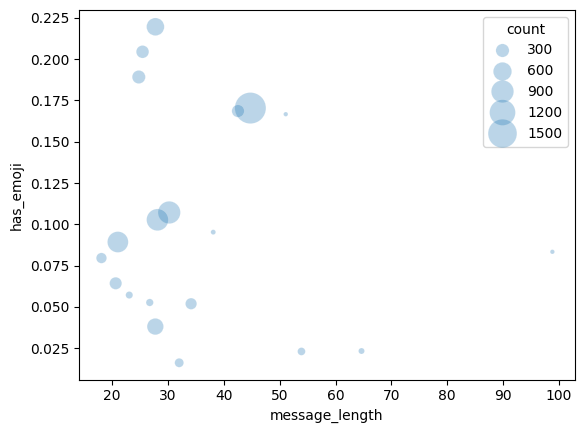

In [8]:
p = df.groupby(["author"]).agg({
    "message_length": "mean",
    "has_emoji": "mean",
    "author": "count"
}).rename(columns={"author": "count"})

p = p[p["count"] > 10]

sns.scatterplot(data=p, x="message_length", y="has_emoji", size="count", sizes=(10, 500), alpha=0.3)

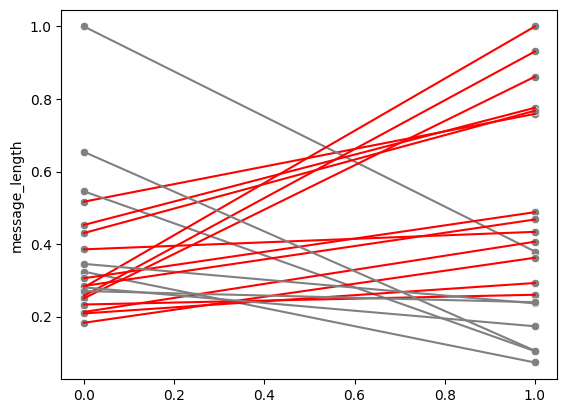

In [7]:
p["message_length"] /= p["message_length"].max()
p["has_emoji"] /= p["has_emoji"].max()
p["color"] = p.apply(lambda x: "grey" if x["message_length"] > x["has_emoji"] else "red", axis=1)

sns.scatterplot(data=p, y="message_length", x=0, color="grey")
sns.scatterplot(data=p, y="has_emoji", x=1, color="grey")
for index, row in p.iterrows():
    sns.lineplot(x=[0, 1], y=[row["message_length"], row["has_emoji"]], color=row["color"])